<a href="https://colab.research.google.com/github/JeanMichelDeveloper/Training/blob/main/Find_object_in_image_with_template_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install opencv
!pip install opencv-contrib-python==4.6.0.66

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#import necessary libraries
import cv2
from google.colab.patches import cv2_imshow

In [3]:
#load image
!wget "https://cdn.pixabay.com/photo/2022/04/12/01/13/stop-7126941_1280.jpg"

--2022-12-16 17:24:31--  https://cdn.pixabay.com/photo/2022/04/12/01/13/stop-7126941_1280.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.37.244, 172.64.150.12, 2606:4700:4400::ac40:960c, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.37.244|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89091 (87K) [binary/octet-stream]
Saving to: ‘stop-7126941_1280.jpg.3’

stop-7126941_1280.j 100%[===================>]  87.00K  --.-KB/s    in 0.005s  

2022-12-16 17:24:31 (17.6 MB/s) - ‘stop-7126941_1280.jpg.3’ saved [89091/89091]



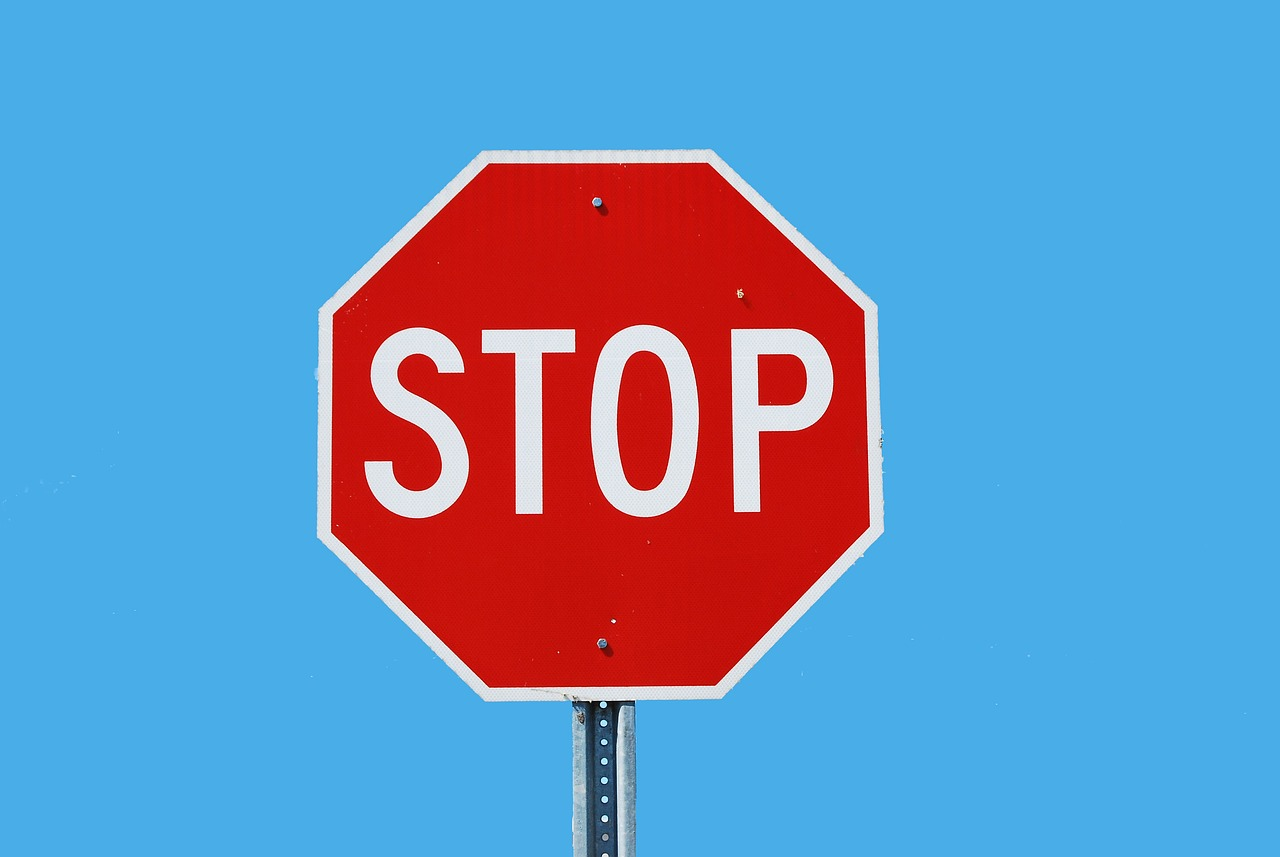

In [4]:
#show image
image = cv2.imread("stop-7126941_1280.jpg")

cv2_imshow(image)

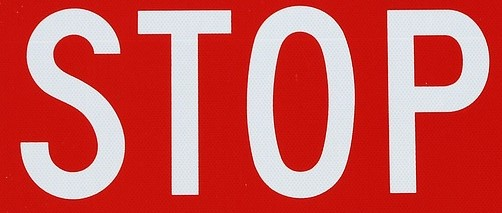

In [6]:
#load mask
mask = cv2.imread("/content/StopSignMask.jpg")

cv2_imshow(mask)

In [8]:
#Match template in image
template = cv2.imread("/content/StopSignMask.jpg", cv2.IMREAD_COLOR)
method = eval("cv2.TM_CCOEFF")

result = cv2.matchTemplate(image,
                  templ = template,
                  method = method)

result

array([[ 4.6983664e+07,  4.8276116e+07,  4.9563860e+07, ...,
        -1.2375939e+04, -6.1623403e+03, -2.0710542e+03],
       [ 4.8644896e+07,  4.9980788e+07,  5.1300704e+07, ...,
        -2.4104859e+04, -1.6037386e+04, -6.5228589e+03],
       [ 5.0330568e+07,  5.1692488e+07,  5.3061988e+07, ...,
        -3.7215574e+04, -2.3660623e+04, -1.2117152e+04],
       ...,
       [ 3.1785222e+07,  3.0432730e+07,  2.9002530e+07, ...,
        -2.3275465e+04, -2.9614387e+04, -3.0967191e+04],
       [ 3.2554502e+07,  3.1415382e+07,  3.0084106e+07, ...,
        -3.1208896e+04, -3.3461199e+04, -3.2405234e+04],
       [ 3.3278342e+07,  3.2214734e+07,  3.1008774e+07, ...,
        -3.7907172e+04, -3.8283078e+04, -3.5096109e+04]], dtype=float32)

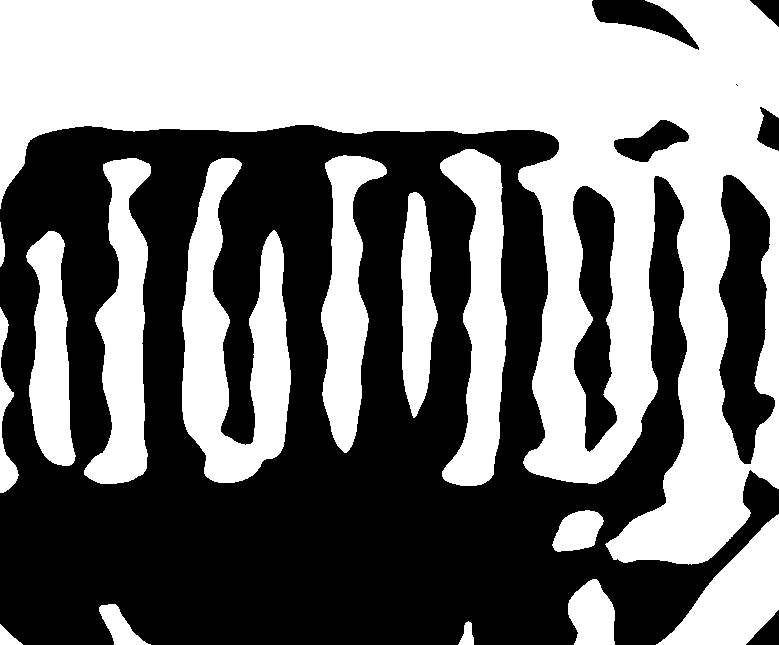

In [9]:
#display result
cv2_imshow(result)

In [11]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

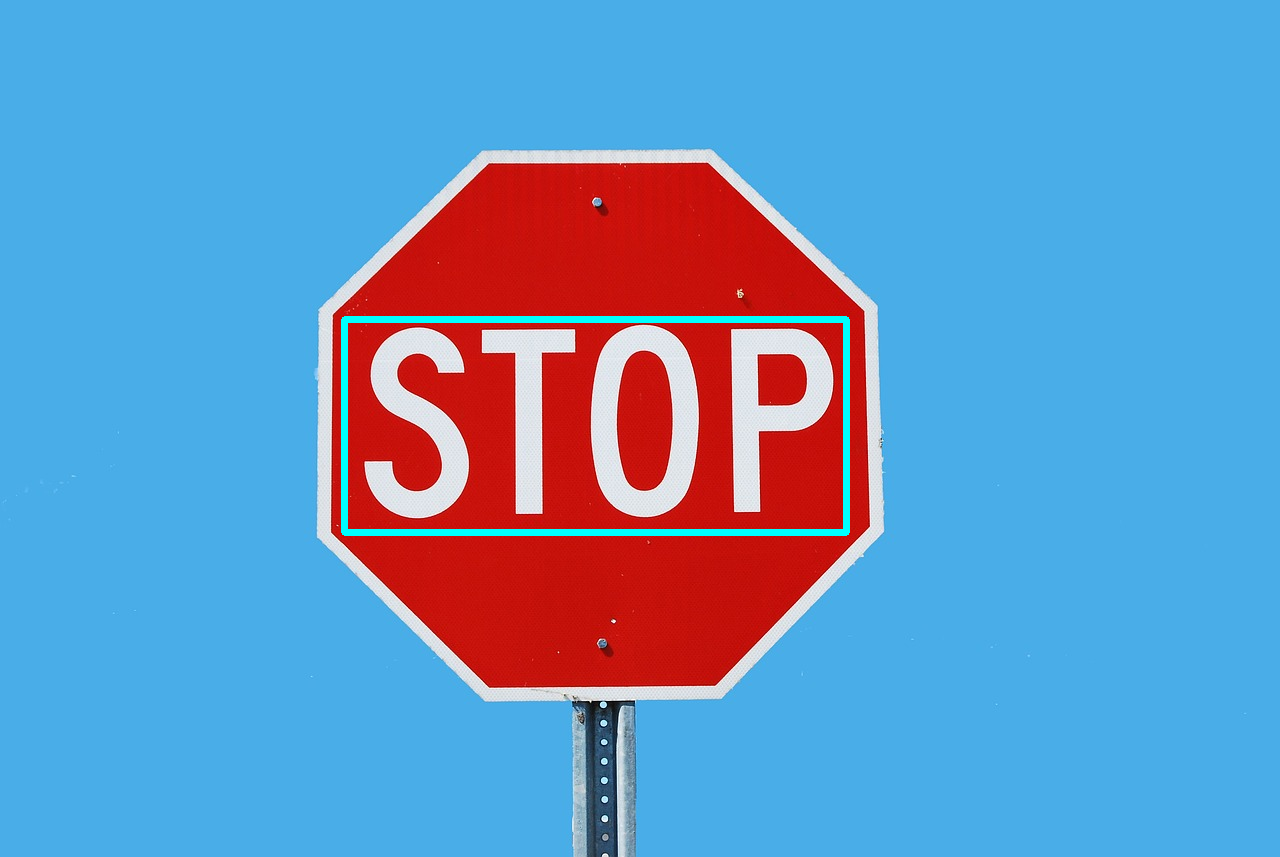

In [15]:
#determine rectangle containing the template in the image
height, width, _ = template.shape

top_left = max_loc

bottom_right = (top_left[0] + width, top_left[1] + height)

color = (255, 255, 0)

thickness = 4

cv2.rectangle(image, 
              top_left, 
              bottom_right,
              color,
              thickness)

cv2_imshow(image)